# Streamplot
> Streamplot of a two-dimensional linear system

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

<img src="python_figures/streamplot.png" alt="least squares" width="600">

## Introduction

Streamplot of a two-dimensional linear system, with eigenvectors and nullclines. Python shows LaTeX equations beautifully.  
Main features: `meshgrid, streamplot, contour, legend, LaTeX`

## The code

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

make graph look pretty

In [2]:
# http://wiki.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
# this is a latex constant, don't change it.
pts_per_inch = 72.27
# write "\the\textwidth" (or "\showthe\columnwidth" for a 2 collumn text)
text_width_in_pts = 300.0
# inside a figure environment in latex, the result will be on the
# dvi/pdf next to the figure. See url above.
text_width_in_inches = text_width_in_pts / pts_per_inch
# make rectangles with a nice proportion
golden_ratio = 0.618
# figure.png or figure.eps will be intentionally larger, because it is prettier
inverse_latex_scale = 2
# when compiling latex code, use
# \includegraphics[scale=(1/inverse_latex_scale)]{figure}
# we want the figure to occupy 2/3 (for example) of the text width
fig_proportion = (3.0 / 3.0)
csize = inverse_latex_scale * fig_proportion * text_width_in_inches
# always 1.0 on the first argument
fig_size = (1.0 * csize, 0.8 * csize)
# find out the fontsize of your latex text, and put it here
text_size = inverse_latex_scale * 12
tick_size = inverse_latex_scale * 8
# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {'backend': 'ps',
          'axes.labelsize': text_size,
          'legend.fontsize': tick_size,
          'legend.handlelength': 2.5,
          'legend.borderaxespad': 0,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'font.family': 'serif',
          'font.size': text_size,
          # Times, Palatino, New Century Schoolbook,
          # Bookman, Computer Modern Roman
          # 'font.serif': ['Times'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          'figure.figsize': fig_size,
          # include here any neede package for latex
          'text.latex.preamble': [r'\usepackage{amsmath}',
                                  ],
          }
plt.rcParams.update(params)
plt.ioff()

# figsize accepts only inches.
fig = plt.figure(1, figsize=fig_size)
fig.subplots_adjust(left=0.10, right=0.97, top=0.82, bottom=0.10,
                    hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)

define parameters, system of equations, and equation for eigenvectors

In [3]:
# parameters as a dictionary
p = {'a': -1.0, 'b': +0.2,
     'c': +1.2, 'd': -1.5}

# the equations
def system_equations(x,y):
    return [p['a'] * x + p['b'] * y,
            p['c'] * x + p['d'] * y,
           ]
# eigenvectors
eigen_vec = 100 * np.array([            
                           [(p['a'] - p['d'] -
                            np.sqrt((p['a'] - p['d']) ** 2 +
                                    4.0 * p['b'] * p['c'])) /
                            (2.0 * p['c']), 1.0],
                           [(p['a'] - p['d'] +
                            np.sqrt((p['a'] - p['d']) ** 2 +
                                    4.0 * p['b'] * p['c'])) /
                            (2.0 * p['c']), 1.0],
                           ])

there are two equivalent ways to build a mesh, choose the one that makes more sense to you...

In [4]:
min_x, max_x = [-1, 1]
min_y, max_y = [-4, 4]
divJ = 50j
div = 50
# 1st way
# Y, X = np.mgrid[min_y:max_y:div,min_x:max_x:div]
# 2nd way
X, Y = np.meshgrid(np.linspace(min_x, max_x, div),
                   np.linspace(min_y, max_y, div))

# streamplot
density = 2 * [0.80]
minlength = 0.2
arrow_color = 3 * [0.5]
ax.streamplot(X, Y, system_equations(X, Y)[0], system_equations(X, Y)[1],
              density=density, color=arrow_color, arrowsize=2,
              linewidth=2, minlength=minlength)

nullclines

In [5]:
null_0 = ax.contour(X, Y, system_equations(X, Y)[0],
                    levels=[0], colors='black', linewidths=3)
null_1 = ax.contour(X, Y,system_equations(X, Y)[1],
                    levels=[0], colors='blue', linewidths=3)
n0 = null_0.collections[0]
n1 = null_1.collections[0]

eigenvectors

In [6]:
eigen_0, = ax.plot([eigen_vec[0, 0],-eigen_vec[0, 0]],
                   [eigen_vec[0, 1],-eigen_vec[0, 1]],
                   color='red', lw=2, ls="--")
eigen_1, = ax.plot([eigen_vec[1, 0],-eigen_vec[1, 0]],
                   [eigen_vec[1, 1],-eigen_vec[1, 1]],
                   color='orange', lw=2, ls="--")
dash = (15, 10, 15, 10)
eigen_0.set_dashes(dash)
eigen_1.set_dashes(dash)

some labels, legend, and text

<IPython.core.display.Javascript object>


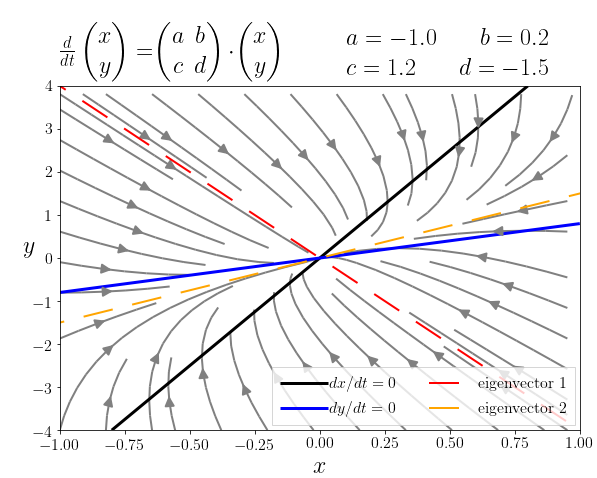

In [7]:
ax.set_ylabel(r"$y$", rotation='horizontal')
ax.set_xlabel(r"$x$", labelpad=5)
ax.legend([n0, n1, eigen_0, eigen_1],
          [r'$dx/dt=0$', r'$dy/dt=0$',
           "eigenvector 1", "eigenvector 2"],
          loc="lower right",
          frameon=True, fancybox=False, shadow=False, ncol=2,
          borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
          borderaxespad=0.3, columnspacing=2)
ax.text(-1.0, 4.3, (r"$\frac{d}{dt}\begin{pmatrix}x\\y\end{pmatrix}=$"
                    r"$\begin{pmatrix}a&b\\c&d\end{pmatrix}\cdot$"
                    r"$\begin{pmatrix}x\\y\end{pmatrix}$"))
ax.text(0.1, 5.0, r"$a={:.1f}\qquad b={:.1f}$\\".format(p['a'], p['b']))
ax.text(0.1, 4.3, r"$c={:.1f}\qquad d={:.1f}$\\".format(p['c'], p['d']))
ax.axis([min_x, max_x, min_y, max_y])
fig.savefig("python_figures/streamplot.png", resolution=300)
plt.draw()
fig